# Euro exchange rates 1999 to 2021

This is a guided project from dataquest.io

The dataset was put together by Daria Chemkaeva and is avaiable from [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). It describes daily exchange rate for the Euro currency from 1999 to 2021.

I will be using various visualisations to display the data.

In [1]:
# load the data
import pandas as pd
exchange_rates = pd.read_csv('data/euro-daily-hist_1999_2020.csv')
print(exchange_rates.head())
print(exchange_rates.tail())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [2]:
# get summary info
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

There are 5,699 rows and 41 columns in the dataset.  
All but three columns are formatted as strings.  
17 columns contain nulls.

In [3]:
# rename and clean time and USD columns
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
print(euro_to_dollar['US_dollar'].value_counts())
# there are 62 dashes that need removing
euro_to_dollar = euro_to_dollar.drop(euro_to_dollar[euro_to_dollar['US_dollar'] == '-'].index,axis=0)
print(euro_to_dollar['US_dollar'].value_counts())
# now convert the column to a float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float')
print(euro_to_dollar['US_dollar'].dtypes)

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64
1.2276    9
1.1215    8
1.1305    7
1.3373    6
1.3532    6
         ..
1.2571    1
1.2610    1
1.2651    1
1.2632    1
1.2193    1
Name: US_dollar, Length: 3527, dtype: int64
float64


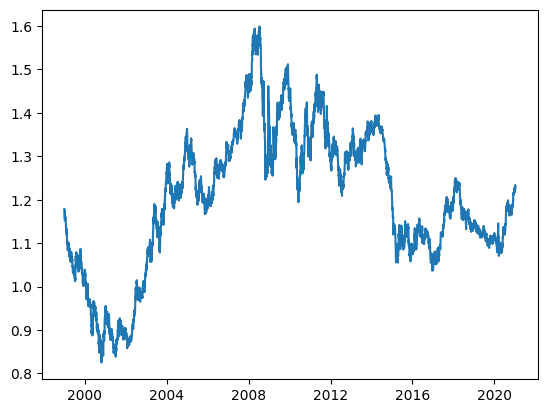

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
# Enables Jupyter to display graphs

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

The above graph of USD to Euro exchange rates is very choppy. As it is using daily datapoints to display over a 22 year period. To create a smooter graph i will be using a rolling mean.

In [6]:
# calculate rolling 30 day mean in a new column
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

I want to examine how the USD to Euro exchange rate changed as more countries adopted the Euro.  
The Euro was founded in 1999 with 11 member countries: Austira, Belgium, Netherlands, Finland, France, Germany, Ireland, Italy, Luxembourg, Portugal and Spain.  
Since then an additional 9 countries have joined the Euro.  
- Greece in 2000
- Slovenia in 2006
- Cyprus and Malta in 2007
- Slovakia in 2008
- Estonia in 2010
- Latvia in 2013
- Lithuania in 2014
- Bulgaria (although not adopting the euro) joined the ERM in 2020
- Croatia in 2022 (outside the dataset for this project)  

I want to show if the exchange rates change when a new member joins and are exchange rates better with more members

In [7]:
euro_to_dollar.head()

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN


[ 9496. 10957. 12418. 13879. 15340. 16801. 18262. 19723.]


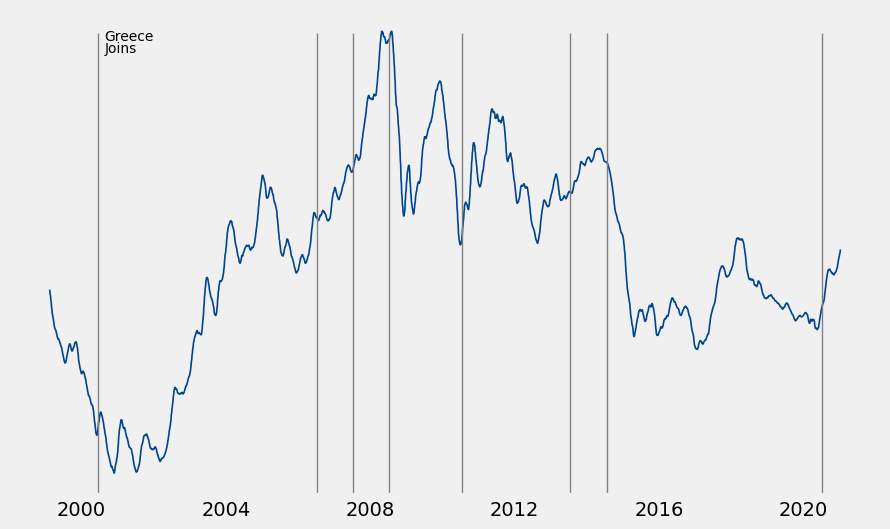

In [8]:
import matplotlib.style as style
import datetime as dt
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'], linewidth=1.2, color='#004494')
# add vertical lines when countries joined
ax.axvline(dt.datetime(2000, 6, 19), linewidth=1, color='grey', ymax=0.95)
ax.axvline(dt.datetime(2006, 7, 11), linewidth=1, color='grey', ymax=0.95)
ax.axvline(dt.datetime(2007, 7, 10), linewidth=1, color='grey', ymax=0.95)
ax.axvline(dt.datetime(2008, 7, 8), linewidth=1, color='grey', ymax=0.95)
ax.axvline(dt.datetime(2010, 7, 13), linewidth=1, color='grey', ymax=0.95)
ax.axvline(dt.datetime(2013, 7, 11), linewidth=1, color='grey', ymax=0.95)
ax.axvline(dt.datetime(2014, 7, 23), linewidth=1, color='grey', ymax=0.95)
ax.axvline(dt.datetime(2020, 7, 10), linewidth=1, color='grey', ymax=0.95)
ax.grid(visible=False)
ax.set_yticklabels([])
ax.text(dt.datetime(2000, 8, 19), 1.56, 'Greece', size=10)
ax.text(dt.datetime(2000, 8, 19), 1.54, 'Joins', size=10)
print(ax.get_xticks()) 
plt.show()

In [ ]:
euro_to_dollar.set_index('Time',inplace=True)

Another idea is to show how exchange rates corresponds to the ages of the EU. And keypoints in EU history.

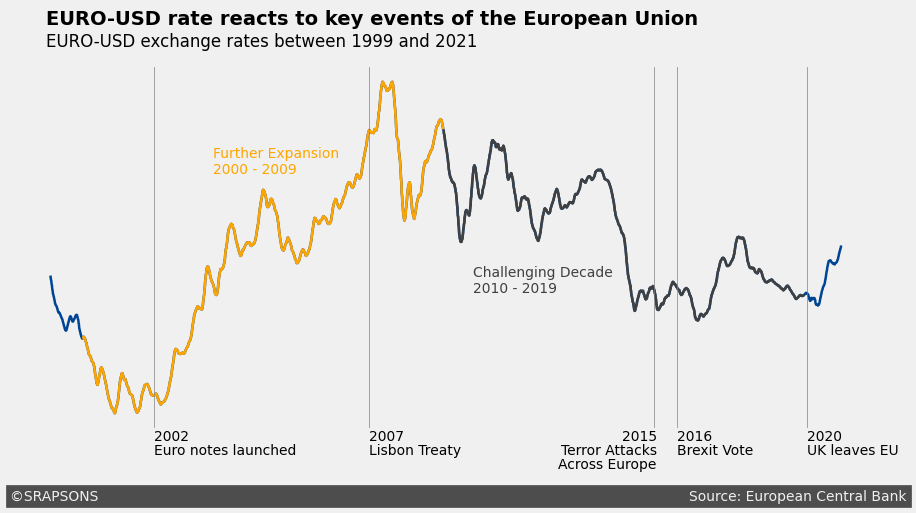

In [12]:

style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,4.5))
ax.plot(euro_to_dollar.index, euro_to_dollar['rolling_mean'], linewidth=1.8, color='#004494')
# highlight grey the difficult decade
ax.plot(euro_to_dollar['2010-01-01':'2019-12-31'].index, euro_to_dollar['rolling_mean']['2010-01-01':'2019-12-31'], 
        linewidth=1.8, color='#404040')
# highlight grey the difficult decade
ax.plot(euro_to_dollar['2000-01-01':'2009-12-31'].index, euro_to_dollar['rolling_mean']['2000-01-01':'2009-12-31'], 
        linewidth=1.8, color='orange')
# add vertical lines when countries joined
ax.axvline(dt.datetime(2016, 6, 23), color='grey', linewidth=0.5, ymax=1.55)
ax.axvline(dt.datetime(2015, 11, 1), color='grey', linewidth=0.5, ymax=1.55)
ax.axvline(dt.datetime(2002, 1, 1), color='grey', linewidth=0.5, ymax=1.55)
ax.axvline(dt.datetime(2007, 12, 13), color='grey', linewidth=0.5, ymax=1.55)
ax.axvline(dt.datetime(2020, 1, 31), color='grey', linewidth=0.5, ymax=1.55)
ax.grid(visible=False)
ax.text(dt.datetime(2003, 8, 19), 1.41, 'Further Expansion', size=10, color='orange')
ax.text(dt.datetime(2003, 8, 19), 1.375, '2000 - 2009', size=10, color='orange')
ax.text(dt.datetime(2010, 11, 1), 1.15, 'Challenging Decade', size=10, color='#404040')
ax.text(dt.datetime(2010, 11, 1), 1.115, '2010 - 2019', size=10, color='#404040')
ax.text(dt.datetime(2020, 1, 31), 0.79, '2020', size=10)
ax.text(dt.datetime(2020, 1, 31), 0.76, 'UK leaves EU', size=10)
ax.text(dt.datetime(2016, 6, 23), 0.79, '2016', size=10)
ax.text(dt.datetime(2016, 6, 23), 0.76, 'Brexit Vote', size=10)
ax.text(dt.datetime(2014, 12, 10), 0.79, '2015', size=10)
ax.text(dt.datetime(2013, 4, 1), 0.76, 'Terror Attacks', size=10)
ax.text(dt.datetime(2013, 3, 10), 0.73, 'Across Europe', size=10)
ax.text(dt.datetime(2007, 12, 13), 0.76, 'Lisbon Treaty', size=10)
ax.text(dt.datetime(2007, 12, 13), 0.79, '2007', size=10)
ax.text(dt.datetime(2002, 1, 1), 0.76, 'Euro notes launched', size=10)
ax.text(dt.datetime(2002, 1, 1), 0.79, '2002', size=10)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(dt.datetime(1999,1,1),1.7,'EURO-USD rate reacts to key events of the European Union',
       size=14, weight='bold')
ax.text(dt.datetime(1999,1,1),1.652,'EURO-USD exchange rates between 1999 and 2021',
       size=12)
ax.text(dt.datetime(1998,1,1), 0.66,
        '©SRAPSONS'    + ' '*135 +  'Source: European Central Bank',
        color = '#f0f0f0',
        backgroundcolor = '#4d4d4d',
        size=10)
plt.show()